# Building a deep learning model with Tensorflow for non linear classification problem
 
There are four steps to build and use a machine learning model.

- Preprocessing ramdomize, normalize, shuffle, clean EDA, split train test
- Learning implementing the model
- Evaluation metrics, tests, over undert, hyper tunning, true positive, false positive
- Prediction on new unseen data

## Problem context

You will implement a deep learning model to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

## 1 -  Preprocessing et EDA

La première étape consiste à charger puis visualizer puis analyser les données

In [35]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(43)

#fonction utilitaire pour afficher les points

def plot_points(X, y):
    sns.scatterplot(X[:, 0], X[:, 1], hue=y.flatten(), cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    plt.show()
    
# fonction utilitaire pour randomiser les données (shuffle)
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    Y2[Y2 == -1] = 0 
    return X2, Y2  

# fonction utilitaire pour split les données en test et train sets
def split_train_test(data, test_size):
    sample = np.random.choice(data.index, size=int(len(data)*(1 - test_size)), replace=False)
    train_data, test_data = data.iloc[sample], data.drop(sample)
    return train_data, test_data 

### Load data

In [2]:
data = pd.read_csv('microships_QA.csv');
data.head()

,test1,test2,result
0,0.336494,-0.985951,-1.0
1,-0.011043,-0.105529,1.0
2,0.238160,-0.617417,1.0
3,-0.366783,-0.713819,1.0
4,1.221923,-1.039399,-1.0


### Split data into train and test sets

In order to test our algorithm, we'll split the data into a Training and a Testing set.

In [3]:
train_data, test_data = split_train_test(data, test_size=0.1)

### Extract features and target columns

In [4]:
X_train = np.array(train_data.drop('result', axis=1))
y_train = np.array(train_data['result']).reshape(-1, 1)
X_test = np.array(test_data.drop('result', axis=1))
y_test = np.array(test_data['result']).reshape(-1, 1)

print("Shape of X_train = ", X_train.shape, "Shape of y_train=", y_train.shape, "\n")
print("Shape of X_test = ",  X_test.shape, "Shape of y_test =",  y_test.shape, "\n")

Shape of X_train =  (90, 2) Shape of y_train= (90, 1) 

Shape of X_test =  (10, 2) Shape of y_test = (10, 1) 



### Randomize features and target columns

In [5]:
X_train, y_train = randomize(X_train, y_train)
X_test, y_test = randomize(X_test, y_test)

### Visualize dataset

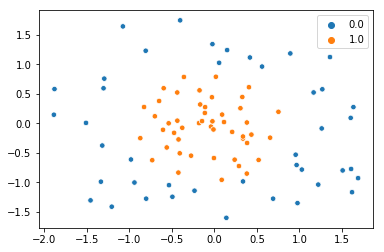

In [6]:
plot_points(X_train, y_train)

## 2 -  Implementing the deep learning model in tf.keras

In [7]:
import tensorflow as tf
from tensorflow.keras import layers

In [8]:
print(tf.VERSION)
print(tf.keras.__version__)

1.13.1
2.2.4-tf


In [9]:
# Create the Sequential model
model =  tf.keras.Sequential()

# 1st Layer - Add an input layer of 32 nodes with the same input shape as
# the training samples in X
model.add(layers.Dense(2, input_dim=X_train.shape[1], kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(layers.Activation('sigmoid'))
# 2nd Layer - Add a fully connected output layer
model.add(layers.Dense(1)) 

# Add a sigmoid activation layer
model.add(layers.Activation('sigmoid')) # output will be one neuro having value between 0 and 1, 
# to make it True or False just compare to 0.5
# or convert to y_train_binary = keras.utils.to_categorical(y_train, num_classes)
# model.add(Dense(num_classes, activation='softmax')) and then softmax it (output will be two neurons)




# or in one line
# layers.Dense(64, activation='sigmoid')
# Or:
# layers.Dense(64, activation=tf.sigmoid)


# OR 

#model = tf.keras.Sequential([
#  layers.Dense(10, activation='softmax', input_shape=(32,)),
#  layers.Dense(10, activation='softmax')
#])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics = ["accuracy"])

Instructions for updating:
Use tf.cast instead.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [12]:
tb = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, 
                                 write_graph=True, 
                                 write_grads=False, write_images=False, 
                                 embeddings_freq=0, 
                                 embeddings_layer_names=None, 
                                 embeddings_metadata=None, 
                                 embeddings_data=None, update_freq='epoch')  
history = model.fit(X_train, y_train, epochs=1000, verbose=1, batch_size=1, callbacks = [tb])

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
90/90 [==============================] - 0s 5ms/sample - loss: 0.3359 - acc: 0.5333
Epoch 2/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.3277 - acc: 0.5333
Epoch 3/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.3200 - acc: 0.5333
Epoch 4/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.3128 - acc: 0.5333
Epoch 5/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.3065 - acc: 0.5333
Epoch 6/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.3009 - acc: 0.5333
Epoch 7/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2960 - acc: 0.5444
Epoch 8/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2920 - acc: 0.5444
Epoch 9/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2885 - acc: 0.5667
Epoch 10/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.

90/90 [==============================] - 0s 1ms/sample - loss: 0.2526 - acc: 0.5333
Epoch 82/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2524 - acc: 0.5333
Epoch 83/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2522 - acc: 0.5333
Epoch 84/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2521 - acc: 0.5333
Epoch 85/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2519 - acc: 0.5333
Epoch 86/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2517 - acc: 0.5333
Epoch 87/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2515 - acc: 0.5333
Epoch 88/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2514 - acc: 0.5333
Epoch 89/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2512 - acc: 0.5333
Epoch 90/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2510 - acc: 0.5333
Epoch 91/1000
90/90 [=============

90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 165/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 166/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 167/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 168/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 169/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 170/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 171/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 172/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 173/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 174/1000
90/90 [===

90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 247/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 248/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 249/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 250/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 251/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 252/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 253/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 254/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 255/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 256/1000
90/90 [===

90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 329/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 330/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 331/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 332/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 333/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 334/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 335/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 336/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 337/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 338/1000
90/90 [===

90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 411/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 412/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 413/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 414/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 415/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 416/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 417/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 418/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 419/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 420/1000
90/90 [===

90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 493/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 494/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 495/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 496/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 497/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 498/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 499/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 500/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 501/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 502/1000
90/90 [===

90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 575/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 576/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 577/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 578/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 579/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 580/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 581/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 582/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 583/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 584/1000
90/90 [===

90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 657/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 658/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 659/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 660/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 661/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 662/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 663/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 664/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 665/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 666/1000
90/90 [===

90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 739/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 740/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 741/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 742/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 743/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 744/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 745/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 746/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 747/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 748/1000
90/90 [===

90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 821/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 822/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 823/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 824/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 825/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 826/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 827/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 828/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 829/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 830/1000
90/90 [===

90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 903/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 904/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 905/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 906/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 907/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 908/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 909/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 910/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 911/1000
90/90 [==============================] - 0s 1ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 912/1000
90/90 [===

90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 985/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 986/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 987/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 988/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 989/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 990/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 991/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 992/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 993/1000
90/90 [==============================] - 0s 2ms/sample - loss: 0.2494 - acc: 0.5333
Epoch 994/1000
90/90 [===

## 3 -  Evaluate 

Once we've trained our neural network, we need to evaluate our model on test data: accuracy, false positive, true positive

In [13]:
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy: {:.3f}%".format(accuracy * 100))

10/10 [==============================] - 0s 14ms/sample - loss: 0.2644 - acc: 0.3000
Accuracy: 30.000%


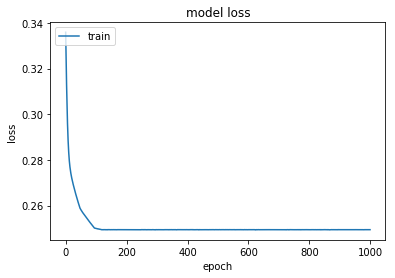

In [14]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Tensorboard

tensorboard --logdir ./logs/

open http://localhost:6006

In [15]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_descision_boundary(estimator, X, y):
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    target = np.c_[xx.ravel(), yy.ravel()]
    Z = (estimator.predict(target) > 0.5).astype(int)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    sns.scatterplot(X0, X1, hue=y.flatten(), cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    plt.show()

**Plot the descision boundary to get a visualization of what our neural networks have learned.**

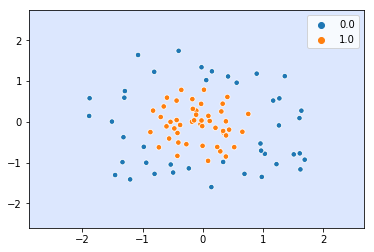

In [16]:
plot_descision_boundary(model, X_train, y_train)

In [17]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
y_pred = (model.predict(X_test) > 0.5).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('confusion matrix', confusion_matrix(y_test, y_pred))
print('tn,fp,fn,tp \n', tn, fp, fn, tp)
print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))
print('f1 score', f1_score(y_test,y_pred))

confusion matrix [[0 7]
 [0 3]]
tn,fp,fn,tp 
 0 7 0 3
precision 0.3
recall 1.0
f1 score 0.4615384615384615


## 4 -  Predict on new unseen data

In [18]:
(model.predict(np.array([[-2, -1]])) > 0.5).astype(int).flatten()[0]

1

On constate qu'un réseau de neurones avec un seul neuronne ne peut apprendre qu'une fonction lineaire W * X +b
Donc résoudre notre problème de classification il faut que notre reseau de neurones apprenne une fonction non lineaire et pour faire cela on va combiner le resultat de plusieurs neuronnes ensemble.


<img src="">

In [19]:
# Create the Sequential model
model =  tf.keras.Sequential()
model.add(layers.Dense(2, input_dim=X_train.shape[1], kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(5)) 
model.add(layers.Activation('relu'))
model.add(layers.Dense(1)) 
model.add(layers.Activation('sigmoid'))

In [20]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics = ["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=100, verbose=1, batch_size=1, callbacks = [tb])

Epoch 1/100
90/90 [==============================] - 1s 6ms/sample - loss: 0.2675 - acc: 0.6000
Epoch 2/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2629 - acc: 0.6000
Epoch 3/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2589 - acc: 0.6333
Epoch 4/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2556 - acc: 0.6333
Epoch 5/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2526 - acc: 0.6222
Epoch 6/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2501 - acc: 0.6333
Epoch 7/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2479 - acc: 0.6444
Epoch 8/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2458 - acc: 0.6333
Epoch 9/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2441 - acc: 0.6444
Epoch 10/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2425 - acc: 0.6556
Epoch 11/100
90/90 [===================

90/90 [==============================] - 0s 2ms/sample - loss: 0.2107 - acc: 0.7000
Epoch 86/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2105 - acc: 0.7000
Epoch 87/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2104 - acc: 0.7000
Epoch 88/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2103 - acc: 0.7000
Epoch 89/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2101 - acc: 0.7000
Epoch 90/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2100 - acc: 0.7000
Epoch 91/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2099 - acc: 0.7000
Epoch 92/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2097 - acc: 0.7000
Epoch 93/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2096 - acc: 0.7000
Epoch 94/100
90/90 [==============================] - 0s 2ms/sample - loss: 0.2095 - acc: 0.7000
Epoch 95/100
90/90 [=======================

In [22]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 15ms/sample - loss: 0.2276 - acc: 0.6000


[0.22755464911460876, 0.6]

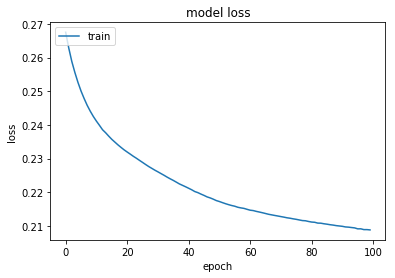

In [23]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

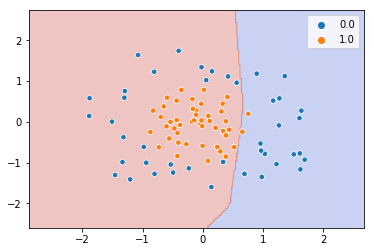

In [24]:
plot_descision_boundary(model, X_train, y_train)

**On commence à apprendre des fonctions non linéaire mais on est encore loin du résultat attendu. On a joute donc encore plus de neurones.**

In [25]:
# Create the Sequential model
model =  tf.keras.Sequential()
model.add(layers.Dense(10, input_dim=X_train.shape[1]))
model.add(layers.Activation('relu'))
model.add(layers.Dense(10)) 
model.add(layers.Activation('relu'))
model.add(layers.Dense(10)) 
model.add(layers.Activation('relu'))
model.add(layers.Dense(1)) 
model.add(layers.Activation('sigmoid'))

sgd = tf.keras.optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics = ["accuracy"])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
__________

In [27]:
history = model.fit(X_train, y_train, epochs=20, verbose=1, batch_size=90, callbacks = [tb])

Epoch 1/20
90/90 [==============================] - 0s 4ms/sample - loss: 0.2723 - acc: 0.5000
Epoch 2/20
90/90 [==============================] - 0s 48us/sample - loss: 0.2716 - acc: 0.5000
Epoch 3/20
90/90 [==============================] - 0s 32us/sample - loss: 0.2710 - acc: 0.4889
Epoch 4/20
90/90 [==============================] - 0s 32us/sample - loss: 0.2703 - acc: 0.5000
Epoch 5/20
90/90 [==============================] - 0s 38us/sample - loss: 0.2697 - acc: 0.5111
Epoch 6/20
90/90 [==============================] - 0s 37us/sample - loss: 0.2691 - acc: 0.5222
Epoch 7/20
90/90 [==============================] - 0s 28us/sample - loss: 0.2684 - acc: 0.5222
Epoch 8/20
90/90 [==============================] - 0s 32us/sample - loss: 0.2678 - acc: 0.5222
Epoch 9/20
90/90 [==============================] - 0s 37us/sample - loss: 0.2672 - acc: 0.5444
Epoch 10/20
90/90 [==============================] - 0s 29us/sample - loss: 0.2667 - acc: 0.5556
Epoch 11/20
90/90 [=====================

In [28]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 16ms/sample - loss: 0.2747 - acc: 0.2000


[0.27468350529670715, 0.2]

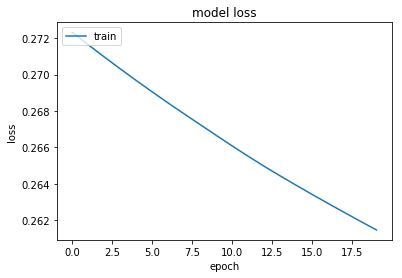

In [29]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
y_pred = (model.predict(X_test) > 0.5).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('confusion matrix', confusion_matrix(y_test, y_pred))
print('tn,fp,fn,tp \n', tn, fp, fn, tp)
print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))
print('f1 score', f1_score(y_test,y_pred))

confusion matrix [[0 7]
 [1 2]]
tn,fp,fn,tp 
 0 7 1 2
precision 0.2222222222222222
recall 0.6666666666666666
f1 score 0.3333333333333333


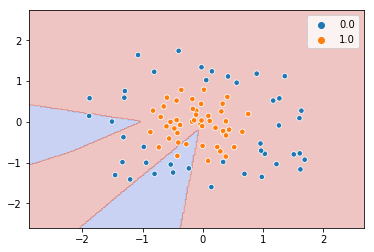

In [31]:
plot_descision_boundary(model, X_train, y_train)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

model =  tf.keras.Sequential()
model.add(layers.Dense(10, input_dim=2))
model.add(layers.Activation('relu'))
model.add(layers.Dense(10)) 
model.add(layers.Activation('relu'))
model.add(layers.Dense(10)) 
model.add(layers.Activation('relu'))
model.add(layers.Dense(1)) 
model.add(layers.Activation('sigmoid'))

from ann_visualizer.visualize import ann_viz
ann_viz(model)

Instructions for updating:
Colocations handled automatically by placer.
